## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Problem Statement
In this data, we have two independent varaiabl (Features) "Hours of Study" and one dependent variable (Target) "Marks".\
You have to train a SVR model to understand the relationship between the Hours of Study and Marks of the Student to predict the student's marks based on their number of hours dedicated to studies.

## Importing the Datasets

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mk-gurucharan/Regression/master/SampleData.csv")

## EDA

In [3]:
df.head()

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [4]:
df.rename(columns={'Hours of Study':'Hours'},inplace=True)

In [5]:
df.describe()

,Hours,Marks
count,100.000000,100.000000
mean,48.958341,72.035051
std,9.746379,15.200087
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,99.051415


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   100 non-null    float64
 1   Marks   100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [7]:
df.isna().sum()

Hours    0
Marks    0
dtype: int64

In [8]:
df.nunique()

Hours    100
Marks    100
dtype: int64

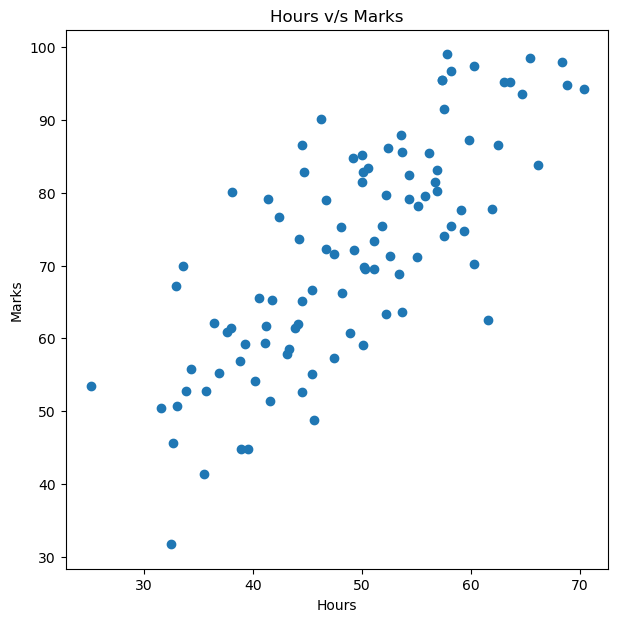

In [9]:
plt.figure(figsize=(7,7))
plt.scatter(df.Hours,df.Marks);
plt.xlabel("Hours")
plt.ylabel("Marks")
plt.title("Hours v/s Marks");

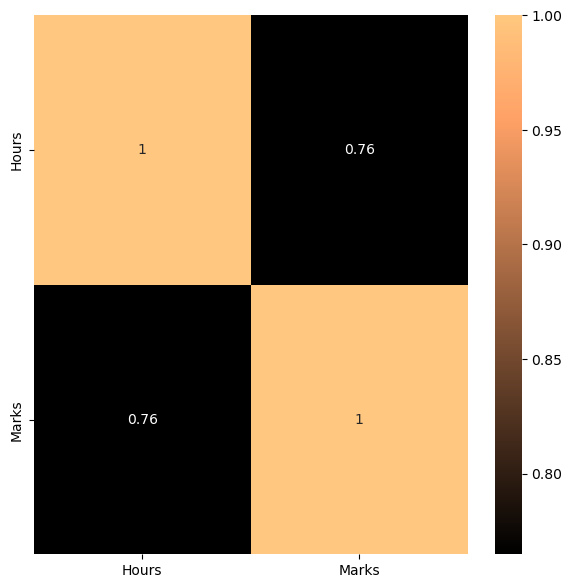

In [10]:
plt.figure(figsize = (7,7))
sns.heatmap(df.corr(),annot=True,cmap="copper");

In [43]:
X = np.array(df.drop(columns='Marks',axis = 1))#np.array(df.iloc[:,0].values,ndmin=2)  
y = np.array(df.iloc[:,-1].values)

In [44]:
X

array([[32.50234527],
       [53.42680403],
       [61.53035803],
       [47.47563963],
       [59.81320787],
       [55.14218841],
       [52.21179669],
       [39.29956669],
       [48.10504169],
       [52.55001444],
       [45.41973014],
       [54.35163488],
       [44.1640495 ],
       [58.16847072],
       [56.72720806],
       [48.95588857],
       [44.68719623],
       [60.29732685],
       [45.61864377],
       [38.81681754],
       [66.18981661],
       [65.41605175],
       [47.48120861],
       [41.57564262],
       [51.84518691],
       [59.37082201],
       [57.31000344],
       [63.61556125],
       [46.73761941],
       [50.55676015],
       [52.22399609],
       [35.56783005],
       [42.43647694],
       [58.16454011],
       [57.50444762],
       [45.44053073],
       [61.89622268],
       [33.09383174],
       [36.43600951],
       [37.67565486],
       [44.55560838],
       [43.31828263],
       [50.07314563],
       [43.87061265],
       [62.99748075],
       [32

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [46]:
model = LinearRegression()

In [47]:
model.fit(X_train, y_train)

LinearRegression()

In [48]:
# Intecepting the values
model.intercept_

13.419980487501014

In [49]:
# Coefficient the value
model.coef_

array([1.21291595])

### Prediction

In [50]:
y_test

array([56.87721319, 81.43619216, 61.4247098 , 50.71958891, 85.49806778,
       71.54663223, 44.84712424, 58.56982472, 62.12457082, 70.25193442,
       62.5623823 , 68.77759598, 61.68403752, 65.28088692, 81.53699078,
       94.25710159, 94.85387123, 95.45505292, 59.35885025, 54.0840548 ])

In [51]:
y_pred = model.predict(X_test)

In [52]:
y_pred

array([60.5015175 , 82.22531578, 66.63134618, 53.56001676, 81.50142421,
       71.0039409 , 60.66884111, 65.96141629, 57.61379747, 86.52147174,
       88.05113298, 78.2222031 , 63.37030456, 64.02365417, 74.10237678,
       98.74385743, 96.8270362 , 82.93219759, 63.27408283, 62.13905284])

### Testing the Model

In [54]:
model.score(X_test, y_test)

0.601240824966744

In [55]:
# R_score
r2_score(y_test, y_pred)

0.601240824966744

In [56]:
mean_squared_error(y_test, y_pred)

85.74216349180828

In [57]:
mean_absolute_error(y_test, y_pred)

6.86289622630746